In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

%matplotlib inline

In [2]:
train_df = pd.read_pickle("./data/train.pkl")

In [3]:
weather_train = pd.read_pickle("./data/weather_train.pkl")

In [4]:
building_meta = pd.read_pickle("./data/building_metadata.pkl")

In [5]:
train_df = train_df.merge(building_meta, on='building_id', how='left')

In [7]:
zero_ratio = train_df.groupby(['building_id', 'meter'])['meter_reading'].apply(lambda x: np.mean(x == 0)).rename('zero_ratio').reset_index()

In [39]:
zero_ratio[zero_ratio.meter ==0].sort_values('zero_ratio').tail(20)

,building_id,meter,zero_ratio
84,71,0,0.385815
49,40,0,0.397603
780,590,0,0.407806
1152,886,0,0.408542
82,69,0,0.412910
1430,997,0,0.491688
55,45,0,0.495958
2377,1446,0,0.501874
1068,815,0,0.514597
1042,799,0,0.524883


In [ ]:
def mask_meter_0_bad(x):
    meter_0 = x.meter == 0
    zero = x.meter_reading == 0
    mask = meter_0 & zero
    return mask

def mask_meter_1_bad(x):
    meter_1 = x.meter == 1
    

In [58]:
train_df.groupby(['building_id', 'meter']).apply(lambda x: "meter" in x.columns).mean()

1.0

In [125]:
bad_rows = find_bad_rows(train_df)

In [126]:
len(bad_rows)

986260

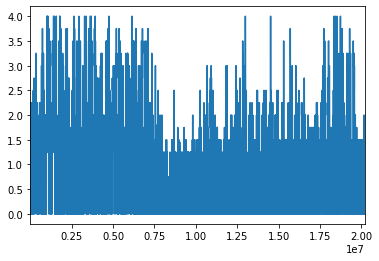

In [42]:
train_df[(train_df.building_id==590) & (train_df.meter == 0)].meter_reading.plot()

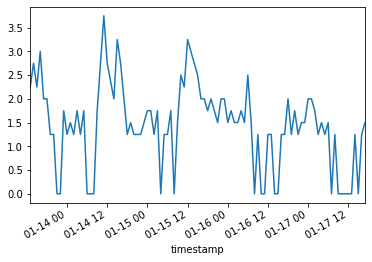

In [49]:
train_df[(train_df.building_id==590) & (train_df.meter == 0)].set_index("timestamp").meter_reading.iloc[300:400].plot()

In [22]:
building_meta[building_meta.building_id == 71]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
71,0,71,Parking,387638,1998.0,NaN


In [54]:
def smooth(x, weight):
    pad_width = int((len(weight) - 1) / 2)
    x_pad = np.pad(x, pad_width, mode='edge')
    return np.convolve(x_pad, weight, mode='valid')